# Scratch Analysis

Problem Study:

An artificial wound (scratch) is made over a bunch of cells and images are taken every hour onwards to observe healing of the wound. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5154238/


1. read image
2. detetct two regions better (Entropy filtering)
3. find the sweet spot for separating two detecting regions (Thresholding)

In [2]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu

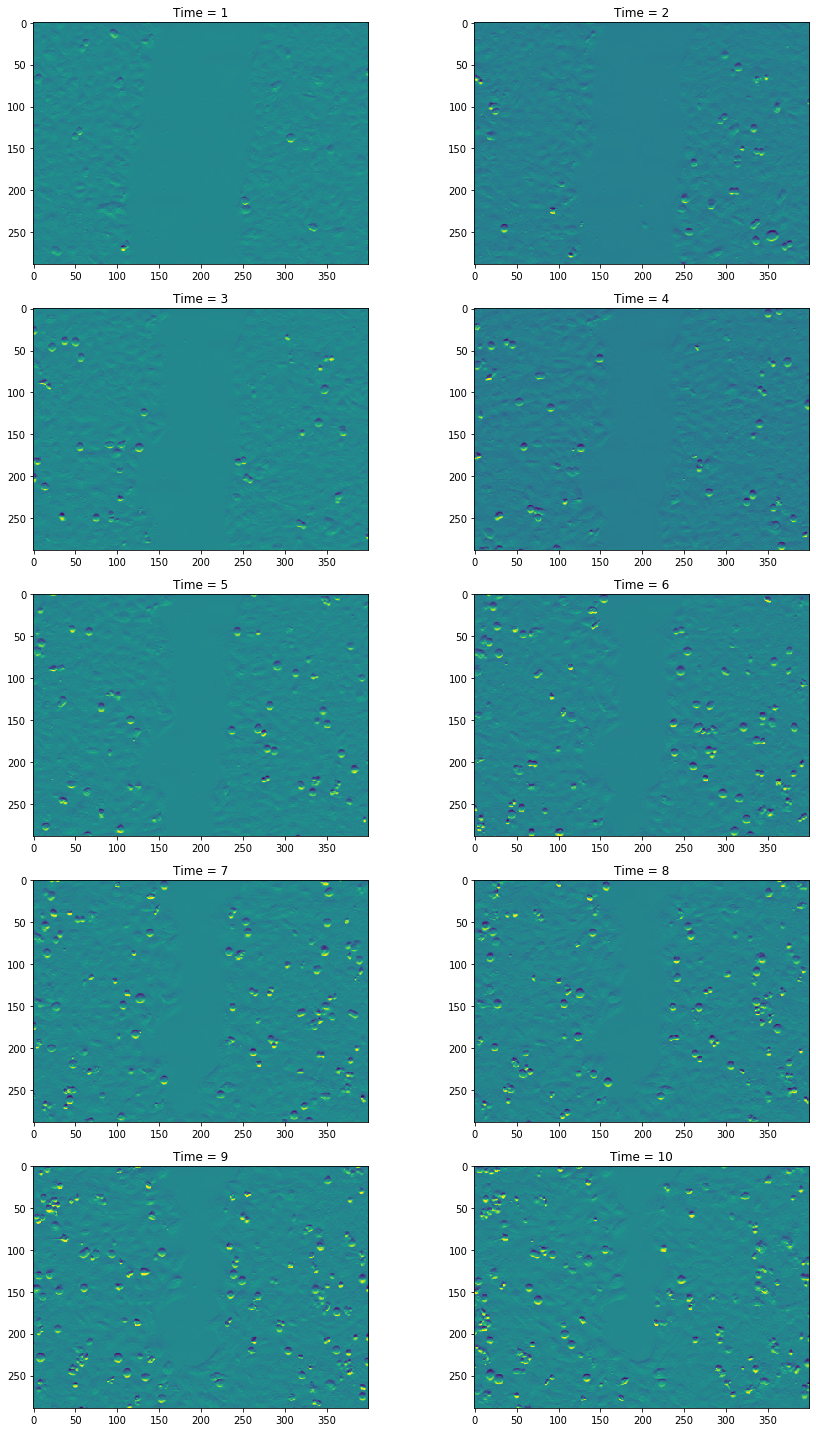

In [3]:
import glob

time = 1

path = "images/scratch_assay/*.*"

fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,20))
fig.subplots_adjust(wspace=0.001)

for ax, file in zip(axes.flatten(),sorted(glob.glob(path))):
    img=io.imread(file)
    ax.imshow(img)
    plt.tight_layout()
    ax.title.set_text("Time = "+str(time))
    time = time + 1

- `glob` helps us to wal through the folder, look for the images and extract their names

time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 21123 pix²
time= 4 hr   Scratch area= 18481 pix²
time= 5 hr   Scratch area= 16105 pix²
time= 6 hr   Scratch area= 14417 pix²
time= 7 hr   Scratch area= 12717 pix²
time= 8 hr   Scratch area= 10957 pix²
time= 9 hr   Scratch area= 9337 pix²
y =  -2504.9818181818187 x  +  30107.618181818187
R² =  0.9568904267126049


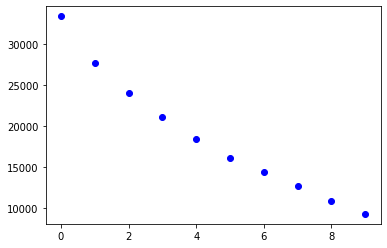

In [45]:
import glob

time = 0
time_list=[]
area_list=[]
path = "images/scratch_assay/*.*"

for file in sorted(glob.glob(path)):
    dict={}
    img=io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
        
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

#print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')  #Print blue dots scatter plot

#Print slope, intercept
from scipy.stats import linregress
#print(linregress(time_list, area_list))


slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
#print("r-squared: %f" % r_value**2)